In [84]:
import pandas as pd
from datetime import datetime

In [120]:
weather_data_filepath = "data/weather_data.csv"
electricity_data_filepath = "data/electricity_production_data.csv"

In [125]:
df_weather = pd.read_csv(weather_data_filepath, delimiter=',')
df_electricity = pd.read_csv(electricity_data_filepath, delimiter=',')

df_weather['time'] = pd.to_datetime(df_weather['referenceTime'])
df_electricity['time'] = pd.to_datetime(df_electricity['måned'], format='%YM%m')
df_weather = df_weather.drop(columns="referenceTime")
df_electricity = df_electricity.drop(columns="måned")

df_weather['month_year'] = df_weather['time'].dt.strftime('%Y-%m')
df_electricity['month_year'] = df_electricity['time'].dt.strftime('%Y-%m')

df_weather['rolling_mean_precipitation'] = df_weather['value'].rolling(window=30).mean()
df_electricity['rolling_mean_electricity'] = df_electricity['value'].rolling(window=30).mean()

df_filtered_weather = df_weather[(df_weather['month_year'] >= df_electricity['month_year'].min()) & (df_weather['month_year'] <= df_electricity['month_year'].max())]
df_filtered_weather.reset_index(drop=True, inplace=True)

In [126]:
df_filtered_weather.head()

,value,time,month_year,rolling_mean_precipitation
0,96.6,1993-01-31 23:00:00+00:00,1993-01,71.210000
1,57.0,1993-02-28 23:00:00+00:00,1993-02,70.453333
2,21.2,1993-03-31 22:00:00+00:00,1993-03,68.986667
3,62.1,1993-04-30 22:00:00+00:00,1993-04,69.166667
4,61.5,1993-05-31 22:00:00+00:00,1993-05,68.816667


In [127]:
df_electricity.head()

,value,time,month_year,rolling_mean_electricity
0,698737,1993-01-01,1993-01,NaN
1,654965,1993-02-01,1993-02,NaN
2,673560,1993-03-01,1993-03,NaN
3,488486,1993-04-01,1993-04,NaN
4,465860,1993-05-01,1993-05,NaN


In [137]:
df_filtered_weather.describe()

,value,rolling_mean_precipitation
count,228.000000,228.000000
mean,71.486404,70.881857
std,40.599599,5.041651
min,0.500000,60.016667
25%,45.750000,66.950833
50%,62.700000,70.688333
75%,91.750000,74.457500
max,220.600000,82.726667


In [138]:
df_electricity.describe()

,value,time,rolling_mean_electricity
count,2.280000e+02,228,199.000000
mean,6.273899e+05,2002-06-16 13:41:03.157894784,630689.866164
min,2.629900e+05,1993-01-01 00:00:00,542170.000000
25%,4.935690e+05,1997-09-23 12:00:00,608055.550000
50%,6.249945e+05,2002-06-16 00:00:00,632683.600000
75%,7.545198e+05,2007-03-08 18:00:00,655791.983333
max,1.031794e+06,2011-12-01 00:00:00,707996.733333
std,1.670362e+05,NaN,38728.726150


In [128]:
import matplotlib.pyplot as plt

def plot_values(data: pd.DataFrame, x_var="time", y_var="value", title: str = None, xlabel="Time", ylabel = "Value"):
    plt.figure(figsize=(12,6))
    plt.plot(data[x_var], data[y_var], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [129]:
merged_df = pd.merge(df_filtered_weather, df_electricity, on='month_year', suffixes=('_precipitation', '_electricity'))

In [157]:
merged_df.head()

,value_precipitation,time_precipitation,month_year,rolling_mean_precipitation,value_electricity,time_electricity,rolling_mean_electricity
0,96.6,1993-01-31 23:00:00+00:00,1993-01,71.210000,698737,1993-01-01,NaN
1,57.0,1993-02-28 23:00:00+00:00,1993-02,70.453333,654965,1993-02-01,NaN
2,21.2,1993-03-31 22:00:00+00:00,1993-03,68.986667,673560,1993-03-01,NaN
3,62.1,1993-04-30 22:00:00+00:00,1993-04,69.166667,488486,1993-04-01,NaN
4,61.5,1993-05-31 22:00:00+00:00,1993-05,68.816667,465860,1993-05-01,NaN


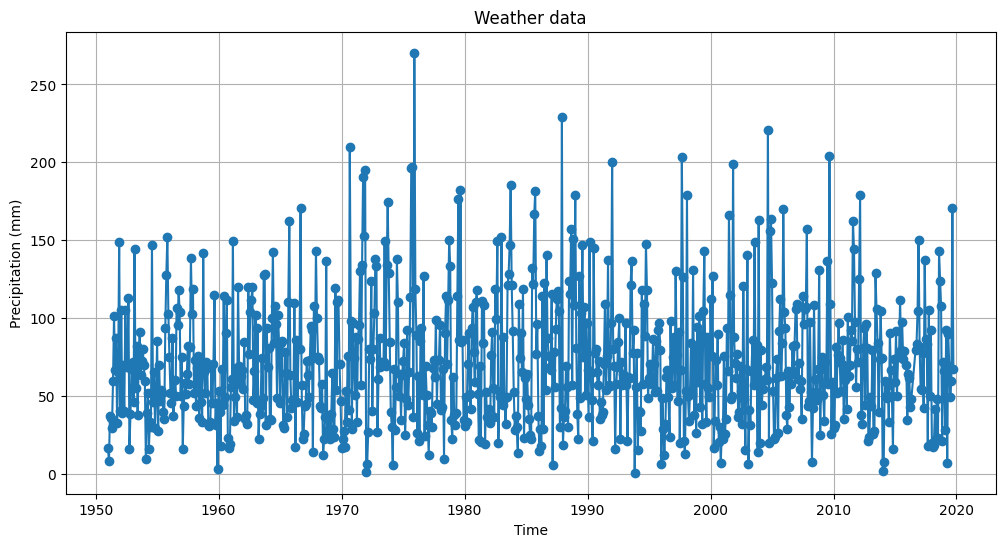

In [130]:
plot_values(df_weather, title="Weather data", ylabel="Precipitation (mm)")

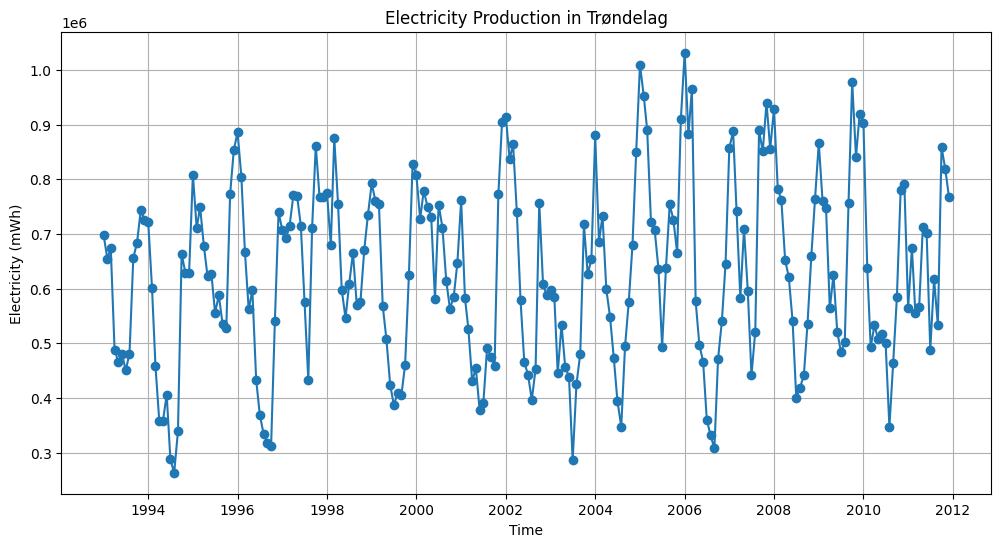

In [131]:
plot_values(df_electricity, title="Electricity Production in Trøndelag", ylabel="Electricity (mWh)")

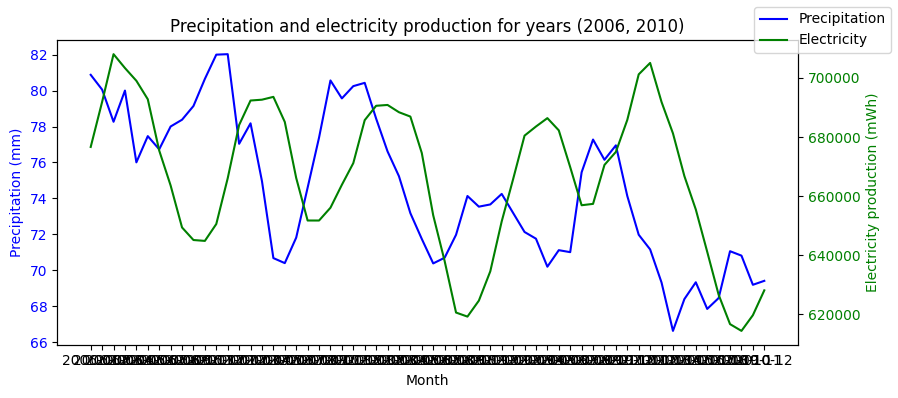

In [166]:
def plot_for_years(df: pd.DataFrame, start_year: int, end_year: int):
    df_merged_filtered = df[(df['time_electricity'].dt.year >= start_year) & (df['time_electricity'].dt.year <= end_year)]

    fig, ax1 = plt.subplots(figsize=(9,4))

    ax1.plot(df_merged_filtered['month_year'], df_merged_filtered['rolling_mean_precipitation'], color='blue', label='Precipitation')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Precipitation (mm)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df_merged_filtered['month_year'], df_merged_filtered['rolling_mean_electricity'], color='green', label='Electricity')
    ax2.set_ylabel('Electricity production (mWh)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    if end_year-start_year == 0:
        plt.title(f'Precipitation and electricity production for year {start_year}')
    else:
        plt.title(f'Precipitation and electricity production for years {start_year, end_year}')
    fig.tight_layout()
    fig.legend()
    plt.show()

plot_for_years(merged_df, 2006, 2010)

Very seasonal, precipitation leading for electricity?

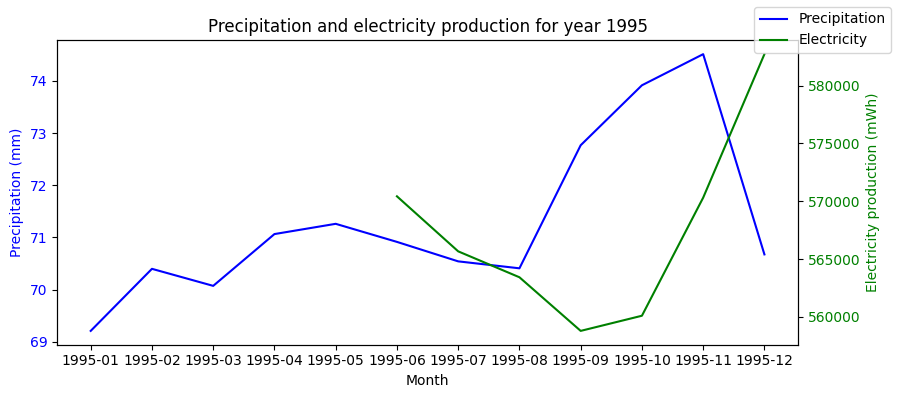

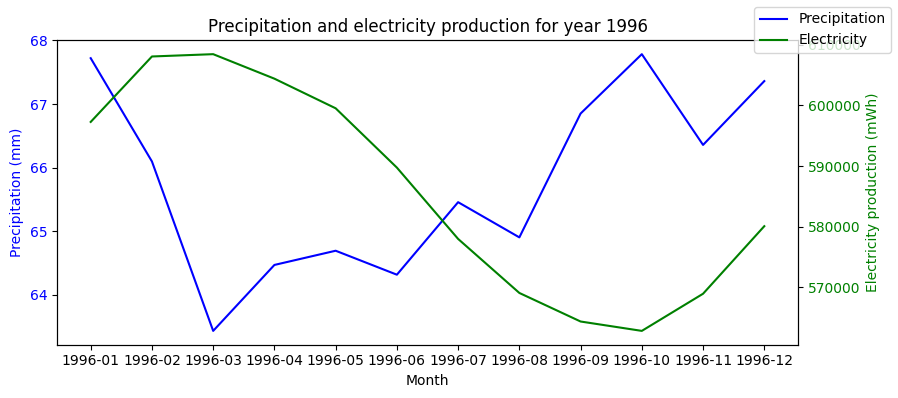

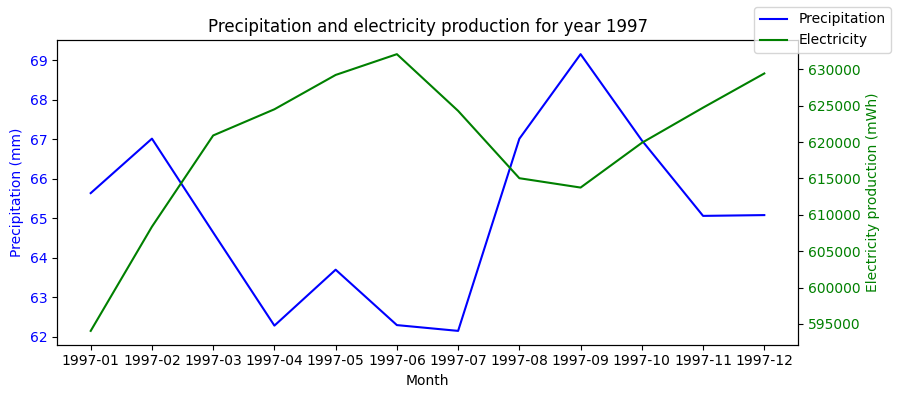

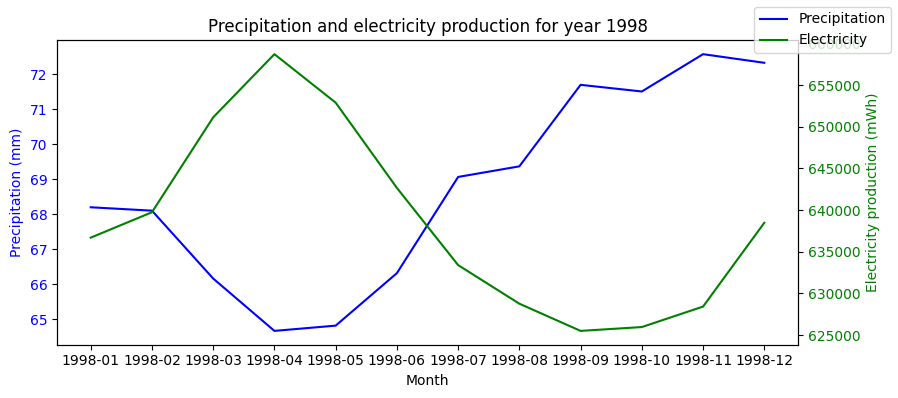

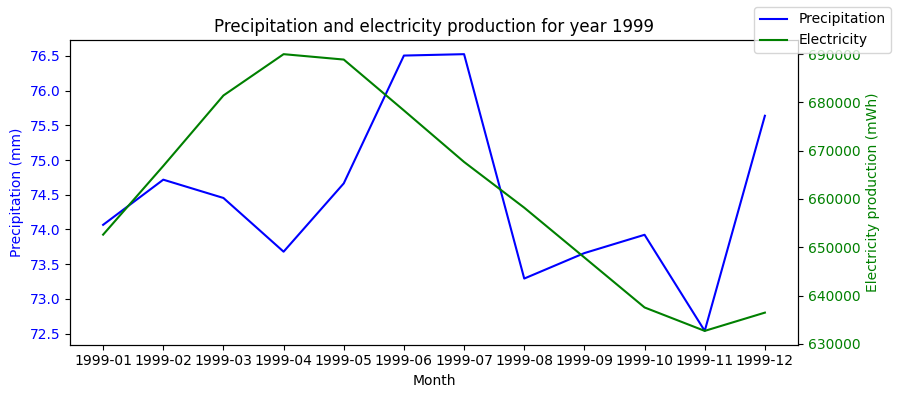

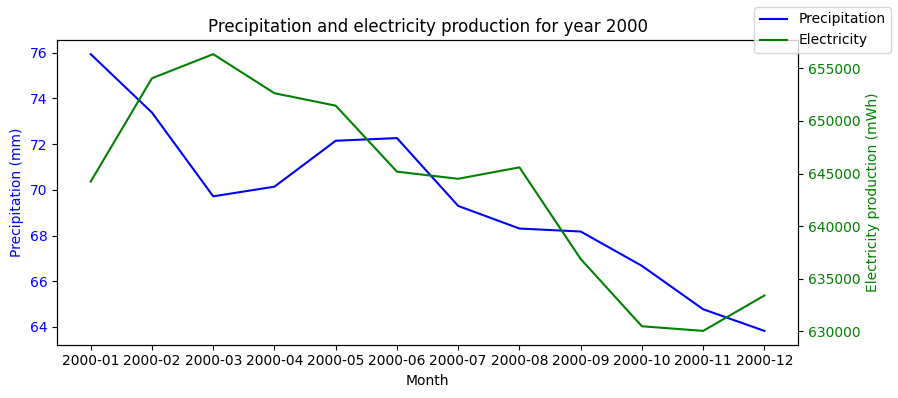

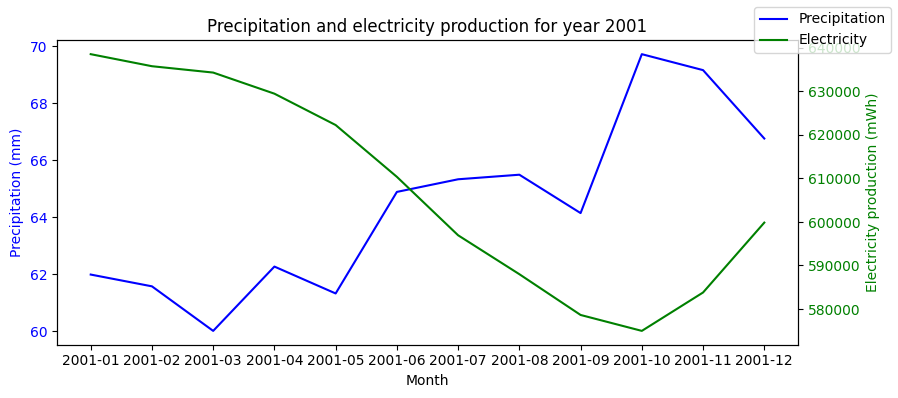

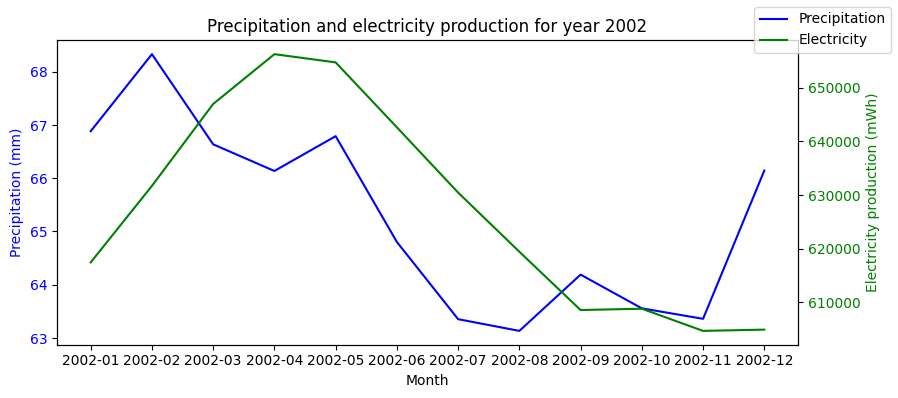

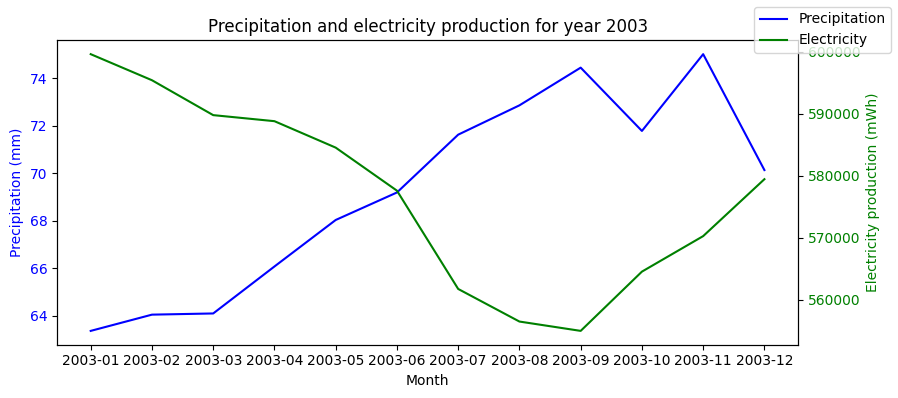

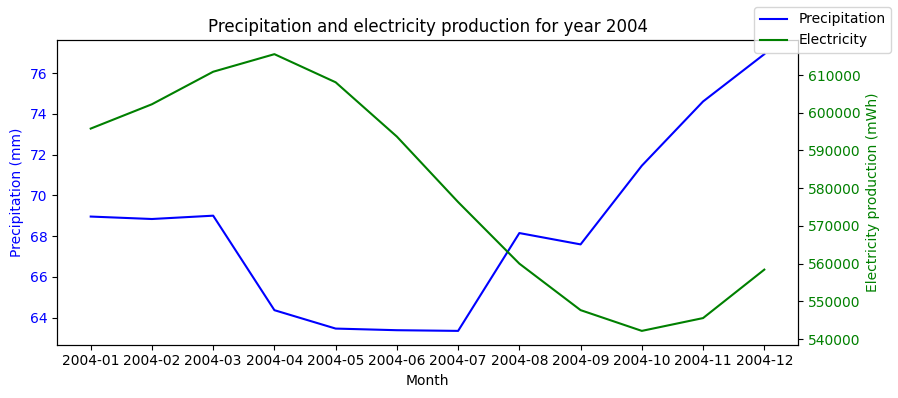

In [167]:
for i in range(1995, 2005):
    plot_for_years(merged_df, i, i)

In [156]:
correlation = df_weather['value'].corr(df_electricity['value'])

print(correlation)

-0.06170420388379766


In [95]:
df_weather['rolling_mean_precipitation'] = df_weather['value'].rolling(window=30).mean()
df_electricity['rolling_mean_electricity'] = df_electricity['value'].rolling(window=30).mean()

In [96]:
df_electricity.describe()

,value,time,rolling_mean_electricity
count,2.280000e+02,228,199.000000
mean,6.273899e+05,2002-06-16 13:41:03.157894784,630689.866164
min,2.629900e+05,1993-01-01 00:00:00,542170.000000
25%,4.935690e+05,1997-09-23 12:00:00,608055.550000
50%,6.249945e+05,2002-06-16 00:00:00,632683.600000
75%,7.545198e+05,2007-03-08 18:00:00,655791.983333
max,1.031794e+06,2011-12-01 00:00:00,707996.733333
std,1.670362e+05,NaN,38728.726150


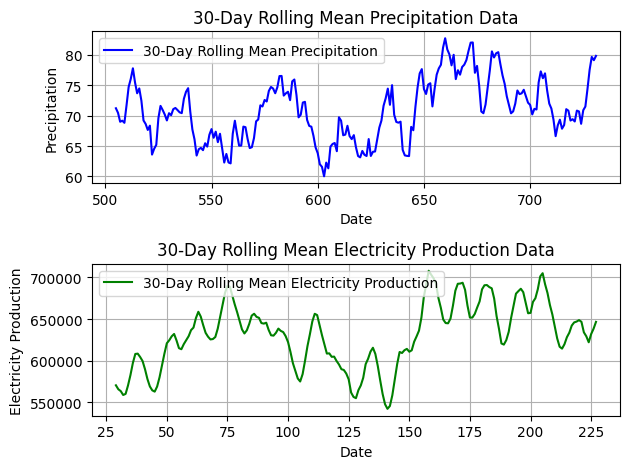

In [98]:
df_weather['time'] = df_weather['time'].dt.tz_localize(None)
df_electricity['time'] = df_electricity['time'].dt.tz_localize(None)

filtered_weather_df = df_weather[(df_weather['time'] > df_electricity['time'].min()) & (df_weather['time'] < df_electricity['time'].max())]
plt.subplot(2, 1, 1)
plt.plot(filtered_weather_df.index, filtered_weather_df['rolling_mean_precipitation'], label='30-Day Rolling Mean Precipitation', color='blue')
plt.title('30-Day Rolling Mean Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df_electricity.index, df_electricity['rolling_mean_electricity'], label='30-Day Rolling Mean Electricity Production', color='green')
plt.title('30-Day Rolling Mean Electricity Production Data')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

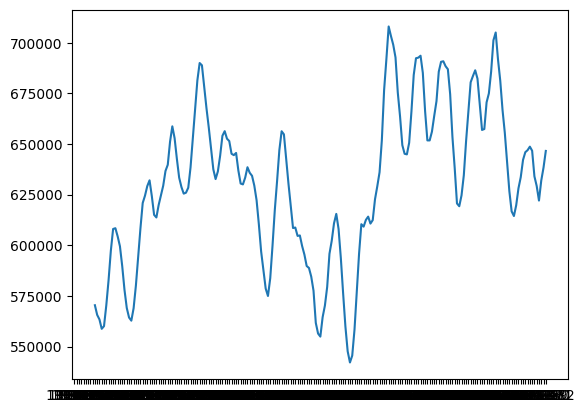

In [160]:
plt.plot(merged_df['month_year'], merged_df['rolling_mean_electricity'])